In [3]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [13]:
df_biker = pd.read_pickle('../data/sdd/filter/agent_type/Biker.pkl')
df_ped =pd.read_pickle('../data/sdd/filter/agent_type/Pedestrian.pkl')

In [3]:
df_biker.shape, df_ped.shape

((103040, 9), (297200, 9))

In [4]:
df_biker.shape[0]/20, df_ped.shape[0]/20

(5152.0, 14860.0)

In [4]:
import os
import cv2
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def create_images_dict(unique_scene, image_path, image_file='reference.jpg', use_raw_data=False):
    images = {}
    for scene in unique_scene:
        if image_file == 'oracle.png':
            im = cv2.imread(os.path.join(image_path, scene, image_file), 0)
        else:
            if use_raw_data:
                scene_name, scene_idx = scene.split("_")
                im_path = os.path.join(
                    image_path, scene_name, f"video{scene_idx}", image_file)
            else:
                im_path = os.path.join(image_path, scene, image_file)
            im = cv2.imread(im_path)
        images[scene] = im
    # images channel: blue, green, red 
    return images

In [20]:
def plot_trajectories_scenes_overlay(image_path, df_biker, df_ped, out_dir='figures/scene_with_trajs', format='png'):
    unique_scene = list(set(df_biker.sceneId.unique()).intersection(set(df_ped.sceneId.unique())))
    scene_images = create_images_dict(unique_scene, image_path, 'reference.png')
    for scene_id in unique_scene:
        print(f'Plotting {scene_id}')
        scene_biker = df_biker[df_biker.sceneId == scene_id]
        scene_ped = df_ped[df_ped.sceneId == scene_id]
        height, width = scene_images[scene_id].shape[0], scene_images[scene_id].shape[1]
        fig = plt.figure(figsize=(height/50, width/50))
        plt.imshow(scene_images[scene_id])
        ms = 2
        for _, traj in scene_biker.groupby('metaId'):
            plt.scatter(traj.x, traj.y, s=ms, c='r', alpha=0.4)
            plt.plot(traj.x, traj.y, 'r-', ms=ms, alpha=0.2)
        plt.plot(0,0,'r-', alpha=0.5, label='Biker')

        for _, traj in scene_ped.groupby('metaId'):
            plt.scatter(traj.x, traj.y, s=ms, c='b', alpha=0.4)
            plt.plot(traj.x, traj.y, 'b-', alpha=0.2)
        plt.plot(0,0,'b-', alpha=0.5, label='Pedestrian')

        plt.plot(0,0,'w')
        plt.title(f'scene: {scene_id}')
        plt.legend(loc='best')
        pathlib.Path(out_dir).mkdir(parents=True, exist_ok=True)
        out_path = os.path.join(out_dir, scene_id + '.' + format)
        plt.savefig(out_path, bbox_inches='tight')
        plt.close(fig)
        print(f'Saved {out_path}')

In [11]:
list(set(df_biker.sceneId.unique()).intersection(set(df_ped.sceneId.unique())))

['hyang_12',
 'nexus_4',
 'little_0',
 'hyang_2',
 'little_3',
 'nexus_7',
 'nexus_6',
 'hyang_0',
 'nexus_0',
 'bookstore_4',
 'gates_2',
 'nexus_11',
 'coupa_3',
 'gates_4',
 'deathCircle_2',
 'nexus_5',
 'hyang_5',
 'gates_5',
 'deathCircle_4',
 'hyang_4',
 'bookstore_2',
 'nexus_1',
 'bookstore_1',
 'gates_7',
 'gates_6',
 'gates_8',
 'bookstore_6',
 'deathCircle_3',
 'gates_1',
 'gates_0',
 'coupa_1',
 'quad_0',
 'bookstore_3',
 'nexus_10',
 'bookstore_0',
 'coupa_2',
 'hyang_3',
 'quad_1',
 'deathCircle_1',
 'gates_3',
 'hyang_10',
 'little_2',
 'nexus_2',
 'nexus_8',
 'bookstore_5',
 'coupa_0',
 'hyang_1',
 'hyang_6',
 'nexus_9',
 'little_1',
 'deathCircle_0',
 'hyang_9',
 'hyang_11',
 'hyang_7']

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


In [23]:
scene_images = create_images_dict(['scene1'], image_path, 'reference.png')

In [24]:
scene1 = scene_images['scene1'].copy()

In [26]:
bg = scene1.mean(axis=2) == 0.0
bg

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True, False]])

In [30]:
scene1.max()

249

In [31]:
scene1[bg] = 255
scene1.mean(axis=2)

array([[255.        , 255.        , 255.        , ..., 255.        ,
        255.        , 255.        ],
       [255.        , 255.        , 255.        , ..., 255.        ,
        255.        , 255.        ],
       [255.        , 255.        , 255.        , ..., 255.        ,
        255.        , 255.        ],
       ...,
       [255.        , 255.        , 255.        , ..., 255.        ,
        255.        , 255.        ],
       [255.        , 255.        , 255.        , ..., 255.        ,
        255.        , 255.        ],
       [255.        , 255.        , 255.        , ..., 255.        ,
        255.        ,   3.33333333]])

In [25]:
scene_images['scene1'].mean(axis=2)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        3.33333333]])

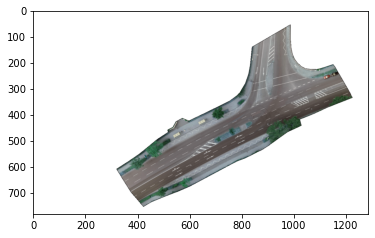

In [32]:

plt.imshow(scene1)

In [35]:
def plot_trajectories_scenes_overlay_modified(image_path, df, out_dir='figures/scene_with_trajs', format='png'):
    # TODO: overlay scene images with trajectories
    unique_scene = df.sceneId.unique()
    unique_agent = df.label.unique()
    colors = {'car': 'red', 'truck_bus': 'blue'}
    scene_images = create_images_dict(unique_scene, image_path, 'reference.png')
    for scene_id in unique_scene:
        scene_img = scene_images[scene_id]
        print(f'Plotting {scene_id}')
        fig = plt.figure(figsize=(scene_img.shape[0]/10, scene_img.shape[1]/10))
        print(scene_img.shape)
        bg = scene_img.mean(axis=2) == 0.0
        scene_img[bg] = 255.0
        plt.imshow(scene_img)
        ms = 6
        linewidth = 4
        for agent in unique_agent:
            print(f'Plotting {agent}')
            scene_agent = df[(df.sceneId == scene_id) & (df.label == agent)]
            for _, traj in scene_agent.groupby('metaId'):
                plt.plot(traj.x, traj.y, linewidth=linewidth, ms=ms, c=colors[agent], alpha=0.4)
                plt.scatter(traj.x, traj.y, s=ms, marker='.', c=colors[agent], alpha=0.6)
            plt.plot(0, 0, c=colors[agent], linewidth=linewidth, alpha=0.5, label=agent)

        plt.title(f'scene: {scene_id}')
        leg = plt.legend(loc='upper center', fontsize=90, bbox_to_anchor=(0.35, 0.9))
        leg.get_lines()[0].set_linewidth(35)
        leg.get_lines()[1].set_linewidth(35)
        pathlib.Path(out_dir).mkdir(parents=True, exist_ok=True)
        out_path = os.path.join(out_dir, scene_id + '.' + format)
        plt.savefig(out_path, bbox_inches='tight')
        plt.close(fig)
        print(f'Saved {out_path}')

In [15]:
image_path = os.path.join('..', 'data', 'sdd', 'raw', 'annotations')
plot_trajectories_scenes_overlay(image_path, df_biker, df_ped, '../figures/scene_with_trajs')

Plotting hyang_12
Saved ../figures/scene_with_trajs/hyang_12.png
Plotting nexus_4
Saved ../figures/scene_with_trajs/nexus_4.png
Plotting little_0
Saved ../figures/scene_with_trajs/little_0.png
Plotting hyang_2
Saved ../figures/scene_with_trajs/hyang_2.png
Plotting little_3
Saved ../figures/scene_with_trajs/little_3.png
Plotting nexus_7
Saved ../figures/scene_with_trajs/nexus_7.png
Plotting nexus_6
Saved ../figures/scene_with_trajs/nexus_6.png
Plotting hyang_0
Saved ../figures/scene_with_trajs/hyang_0.png
Plotting nexus_0
Saved ../figures/scene_with_trajs/nexus_0.png
Plotting bookstore_4
Saved ../figures/scene_with_trajs/bookstore_4.png
Plotting gates_2
Saved ../figures/scene_with_trajs/gates_2.png
Plotting nexus_11
Saved ../figures/scene_with_trajs/nexus_11.png
Plotting coupa_3
Saved ../figures/scene_with_trajs/coupa_3.png
Plotting gates_4
Saved ../figures/scene_with_trajs/gates_4.png
Plotting deathCircle_2
Saved ../figures/scene_with_trajs/deathCircle_2.png
Plotting nexus_5
Saved ../f

In [15]:
a = create_images_dict(['bookstore_0'], image_path, 'reference.jpg', True)

In [19]:
a['bookstore_0'].shape

(1088, 1424, 3)

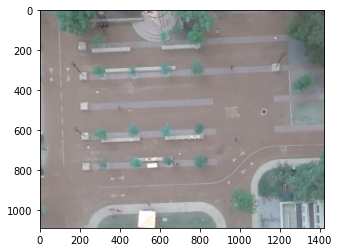

In [20]:
plt.imshow(a['bookstore_0'])

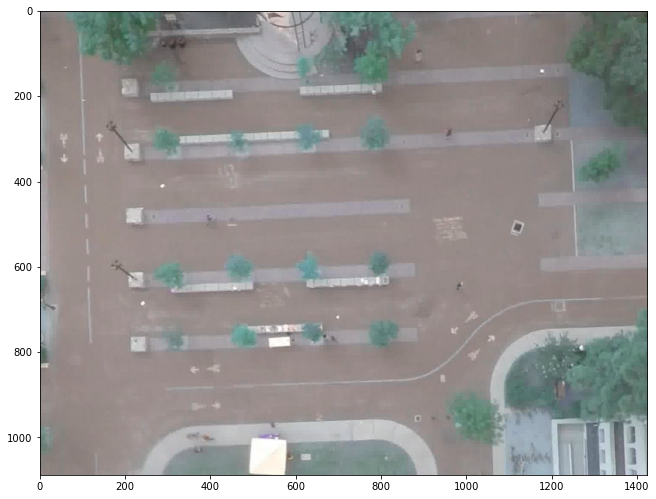

In [22]:
plt.figure(figsize=(a['bookstore_0'].shape[0]/100, a['bookstore_0'].shape[1]/100))
plt.imshow(a['bookstore_0'])

## Visualize inD dataset 

In [1]:
import pandas as pd

In [5]:
image_path = '/data/dli-data/inD-dataset-v1.0/images'

In [6]:
car = pd.read_pickle('../data/inD-dataset-v1.0/filter/agent_type/scene1/car_8_12.pkl')
truck = pd.read_pickle('../data/inD-dataset-v1.0/filter/agent_type/scene1/truck_bus_8_12.pkl')

In [7]:
car

,trackId,frame,x,y,sceneId,metaId,label,recId
0,0,0,862.107546,228.240157,scene1,0,car,00
1,0,10,858.950394,251.981234,scene1,0,car,00
2,0,20,855.750459,274.331693,scene1,0,car,00
3,0,30,852.274278,294.018832,scene1,0,car,00
4,0,40,848.835236,311.005971,scene1,0,car,00
...,...,...,...,...,...,...,...,...
108455,383,27351,874.904265,422.966273,scene1,5422,car,06
108456,383,27361,894.779134,403.357415,scene1,5422,car,06
108457,383,27371,912.335696,382.331955,scene1,5422,car,06
108458,383,27381,927.260958,359.797047,scene1,5422,car,06


In [33]:
df_car_truck = pd.concat([car, truck], axis=0)

In [7]:
df_car_truck_filter = pd.concat([car_filter, truck_filter], axis=0)

In [36]:
plot_trajectories_scenes_overlay_modified(image_path, df_car_truck_filter, out_dir='./', format='pdf')

Plotting scene1
(780, 1287, 3)
Plotting car
Plotting truck_bus
Saved ./scene1.pdf


In [27]:
truck.metaId.unique().shape[0], car.metaId.unique().shape[0]

(230, 4024)

In [2]:
car_varf = pd.read_pickle('/data/dli-data/inD-dataset-v1.0/images/car_varf.pkl')
truck_varf = pd.read_pickle('/data/dli-data/inD-dataset-v1.0/images/truck_varf.pkl')

In [3]:
import seaborn as sns

In [6]:
car_filter = pd.read_pickle('/data/dli-data/inD-dataset-v1.0/filter/agent_type/scene1/car_filter.pkl')
truck_filter = pd.read_pickle('/data/dli-data/inD-dataset-v1.0/filter/agent_type/scene1/truck_bus_filter.pkl')

In [5]:
import matplotlib.pyplot as plt 

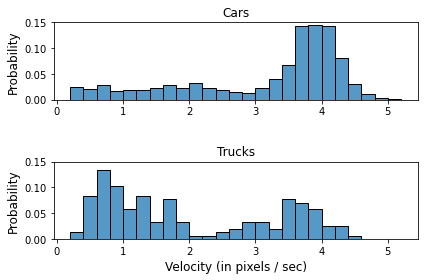

In [7]:
factor = 'avg_vel'
fontsize = 12
fig, axes = plt.subplots(2, 1, figsize=(6, 4))
d_car = car_varf[car_varf.sceneId.apply(lambda x: x in ['scene1']) & (car_varf.label == 'car')]
d_truck = truck_varf[truck_varf.sceneId.apply(lambda x: x in ['scene1']) & (truck_varf.label == 'truck_bus')]
sns.histplot(d_car, x=factor, stat='probability', binwidth=0.2, binrange=(0.2, 5.2), ax=axes[0])
sns.histplot(d_truck, x=factor, stat='probability', binwidth=0.2, binrange=(0.2, 5.2), ax=axes[1])
axes[0].set_title('Cars', fontsize=fontsize)
# axes[0].set_xticks([])
axes[0].set_xlabel('')
axes[0].set_ylim(0, 0.15)
axes[0].set_ylabel('Probability', fontsize=fontsize)
axes[1].set_ylabel('Probability', fontsize=fontsize)
axes[1].set_title('Trucks', fontsize=fontsize)
axes[1].set_xlabel('Velocity (in pixels / sec)', fontsize=fontsize)
axes[1].set_ylim(0, 0.15)
fig.tight_layout()
fig.subplots_adjust(hspace=0.8)
plt.savefig('../car_truck_velocity_distribution.pdf')

Text(0.5, 1.0, 'car: 4024')

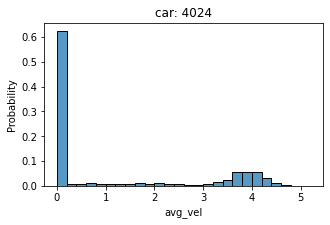

In [52]:
factor = 'avg_vel'
d = car_varf[car_varf.sceneId.apply(lambda x: x in ['scene1']) & (car_varf.label == 'car')]
fig, axes = plt.subplots(1, 1, figsize=(5, 3))
sns.histplot(d, x=factor, stat='probability', binwidth=0.2)
plt.title(f'car: {car_varf.shape[0]}')

Text(0.5, 1.0, 'truck_bus: 230')

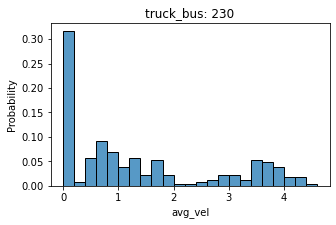

In [51]:
factor = 'avg_vel'
d = truck_varf[truck_varf.sceneId.apply(lambda x: x in ['scene1']) & (truck_varf.label == 'truck_bus')]
fig, axes = plt.subplots(1, 1, figsize=(5, 3))
sns.histplot(d, x=factor, stat='probability', binwidth=0.2)
plt.title(f'truck_bus: {truck_varf.shape[0]}')

Text(0.5, 1.0, 'car filtered: 1508')

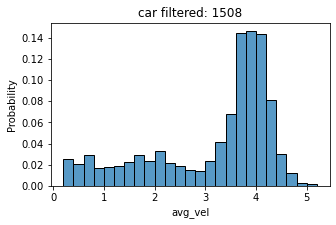

In [54]:
factor = 'avg_vel'
d = car_varf[car_varf.sceneId.apply(lambda x: x in ['scene1']) & (car_varf.label == 'car')]
d_filter = d[d[factor] >= 0.2]
fig, axes = plt.subplots(1, 1, figsize=(5, 3))
sns.histplot(d_filter, x=factor, stat='probability', binwidth=0.2)
plt.title(f'car filtered: {d_filter.shape[0]}')

Text(0.5, 1.0, 'truck_bus filtered: 157')

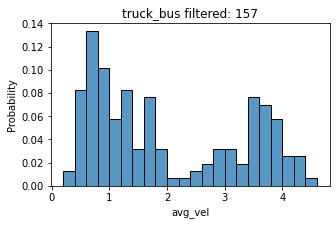

In [58]:
factor = 'avg_vel'
d = truck_varf[truck_varf.sceneId.apply(lambda x: x in ['scene1']) & (truck_varf.label == 'truck_bus')]
d_filter = d[d[factor] >= 0.2]
fig, axes = plt.subplots(1, 1, figsize=(5, 3))
sns.histplot(d_filter, x=factor, stat='probability', binwidth=0.2, binrange=(0.2, 4.6))
plt.title(f'truck_bus filtered: {d_filter.shape[0]}')

In [59]:
# filter car 
car_varf_filtered = car_varf[car_varf.sceneId.apply(lambda x: x in ['scene1']) & (car_varf.label == 'car')]
car_varf_filtered = car_varf_filtered[car_varf_filtered[factor] >= 0.2]
car_filtered = car[car.metaId.isin(car_varf_filtered.metaId.unique())]

In [69]:
# filter truck 
truck_varf_filtered = truck_varf[truck_varf.sceneId.apply(lambda x: x in ['scene1'])]
truck_varf_filtered = truck_varf_filtered[truck_varf_filtered[factor] >= 0.2]
truck_filtered = truck[truck.metaId.isin(truck_varf_filtered.metaId.unique())]

In [64]:
car.shape[0]/20, car_filtered.shape[0]/20

(4024.0, 1508.0)

In [70]:
truck.shape[0]/20, truck_filtered.shape[0]/20

(230.0, 157.0)

In [71]:
car_filtered.to_pickle('../data/inD/filter/agent_type/scene1/car_filter.pkl')
truck_filtered.to_pickle('../data/inD/filter/agent_type/scene1/truck_bus_filter.pkl')

## Check data number for appendix

In [1]:
import pandas as pd

In [2]:
ped = pd.read_pickle('/data/dli-data/inD-dataset-v1.0/filter/agent_type/scene234/pedestrian.pkl')

In [4]:
ped.shape

(42770, 8)

In [3]:
ped[ped.metaId == 902]

,trackId,frame,x,y,sceneId,metaId,label,recId
31570,31,2217,256.721335,69.443387,scene2,902,pedestrian,07
31571,31,2242,267.350942,79.050983,scene2,902,pedestrian,07
31572,31,2267,276.964578,91.597359,scene2,902,pedestrian,07
31573,31,2292,287.502662,104.240274,scene2,902,pedestrian,07
31574,31,2317,297.761057,116.633497,scene2,902,pedestrian,07
31575,31,2342,307.943182,128.410729,scene2,902,pedestrian,07
31576,31,2367,318.468776,139.973178,scene2,902,pedestrian,07
31577,31,2392,328.303747,151.505938,scene2,902,pedestrian,07
31578,31,2417,338.380016,163.819820,scene2,902,pedestrian,07
31579,31,2442,348.894247,176.193079,scene2,902,pedestrian,07


In [9]:
ped[ped.metaId == 902].shape

(35, 8)

In [10]:
ped.shape[0] / ped[ped.metaId == 902].shape[0]

1222.0

In [11]:
ped_train = pd.read_pickle('../data/inD-dataset-v1.0/filter/agent_type/scene234/pedestrian/train.pkl')
ped_val = pd.read_pickle('../data/inD-dataset-v1.0/filter/agent_type/scene234/pedestrian/val.pkl')
ped_test = pd.read_pickle('../data/inD-dataset-v1.0/filter/agent_type/scene234/pedestrian/test.pkl')

In [13]:
ped_train.shape[0] / ped[ped.metaId == 902].shape[0], ped_val.shape[0] / ped[ped.metaId == 902].shape[0], ped_test.shape[0] / ped[ped.metaId == 902].shape[0]

(1222.0, 174.0, 174.0)

In [16]:
ped_val.metaId.unique()

array([ 55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 104, 105, 106, 107, 195, 196, 197,
       198, 199, 201, 204, 205, 206, 207, 209, 312, 313, 315, 317, 318,
       319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 331, 332,
       333, 334, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 362, 363, 364, 365,
       366, 367, 368, 369, 370, 371, 372, 462, 464, 466, 467, 468, 469,
       470, 473, 474, 475, 531, 532, 533, 534, 535, 536, 540, 541, 620,
       621, 623, 624, 625, 626, 627, 630, 631, 632, 634, 635, 636, 637,
       646, 647, 710, 711, 712, 715, 716, 722, 723, 724, 725, 726, 727,
       728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740,
       743, 744, 745, 746, 749])

In [19]:
a = ped_train.metaId.unique()
a.sort()
a

array([  902,   903,   904, ..., 11267, 11268, 11272])

In [22]:
174 + 1222, 174 / (174 + 1222)

(1396, 0.12464183381088825)

In [21]:
(ped_val == ped_test).all()

trackId    True
frame      True
x          True
y          True
sceneId    True
metaId     True
label      True
recId      True
dtype: bool

In [23]:
ped_scene1_train = pd.read_pickle('../data/inD-dataset-v1.0/filter/agent_type/scene1/pedestrian/train.pkl')
ped_scene1_val = pd.read_pickle('../data/inD-dataset-v1.0/filter/agent_type/scene1/pedestrian/val.pkl')
ped_scene1_test = pd.read_pickle('../data/inD-dataset-v1.0/filter/agent_type/scene1/pedestrian/test.pkl')

In [24]:
ped_scene1_train.shape, ped_scene1_val.shape, ped_scene1_test.shape

((700, 8), (1400, 8), (3990, 8))

In [28]:
unit = ped_scene1_test[ped_scene1_test.metaId == 55].shape[0]

In [29]:
ped_scene1_train.shape[0] / unit, ped_scene1_val.shape[0] / unit, ped_scene1_test.shape[0] / unit

(20.0, 40.0, 114.0)

In [5]:
car = pd.read_pickle('/data/dli-data/inD-dataset-v1.0/filter/agent_type/scene1/car_filter/train.pkl')

In [32]:
car[car.metaId == 0].shape

(20, 8)

In [6]:
car

,trackId,frame,x,y,sceneId,metaId,label,recId
0,0,0,862.107546,228.240157,scene1,0,car,00
1,0,10,858.950394,251.981234,scene1,0,car,00
2,0,20,855.750459,274.331693,scene1,0,car,00
3,0,30,852.274278,294.018832,scene1,0,car,00
4,0,40,848.835236,311.005971,scene1,0,car,00
...,...,...,...,...,...,...,...,...
108415,381,27235,675.087795,463.853871,scene1,5420,car,06
108416,381,27245,640.218307,480.872703,scene1,5420,car,06
108417,381,27255,605.220932,498.631890,scene1,5420,car,06
108418,381,27265,570.218898,517.006168,scene1,5420,car,06
